# Looking at other nights' photometry

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits
import glob
import os

sns.set(style='white', context='poster')

In [28]:
def plot_frms(files, hdu='flux', xlim=None, ylim=None):
    fig, axes = plt.subplots(1, len(files), sharex=True, sharey=True)
    for (filename, axis) in zip(sorted(files), axes):
        with fits.open(filename) as infile:
            flux = infile[hdu].data
        
        if hdu.lower() == 'casudet':
            flux = 10 ** ((25. - flux) / 2.5)
            
        med_flux = np.median(flux, axis=1)
        frms = np.std(flux, axis=1) / med_flux
        
        axis.loglog(med_flux, frms, '.', ms=5)
        axis.set(title=':'.join([os.path.basename(filename), hdu]))
        if xlim:
            axis.set(xlim=xlim)
        if ylim:
            axis.set(ylim=ylim)
        axis.grid(True, which='both')
    fig.tight_layout()

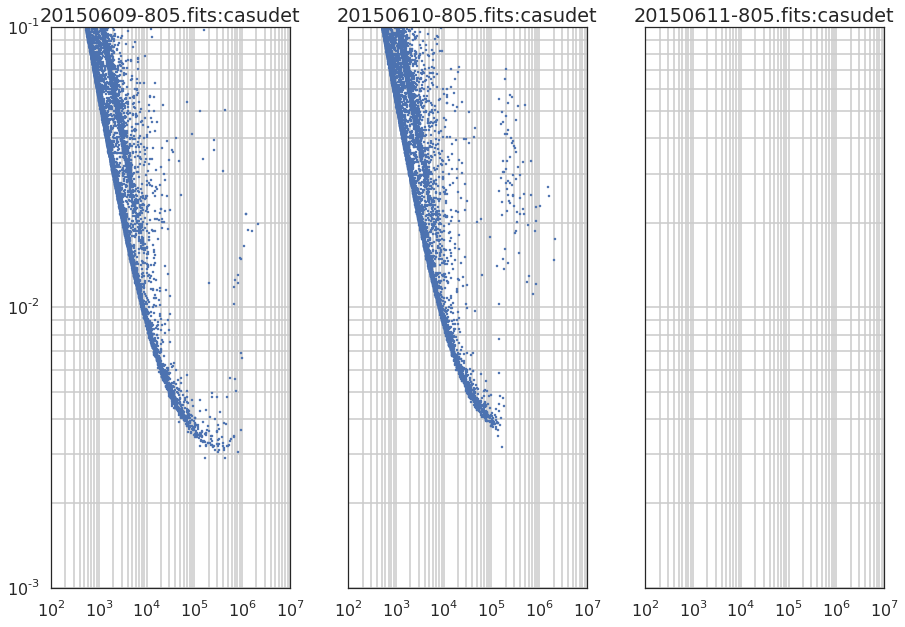

In [29]:
plot_frms(glob.glob('other_nights/*805*.fits'), hdu='casudet', xlim=(1E2, 1E7), ylim=(1E-3, 1E-1))    

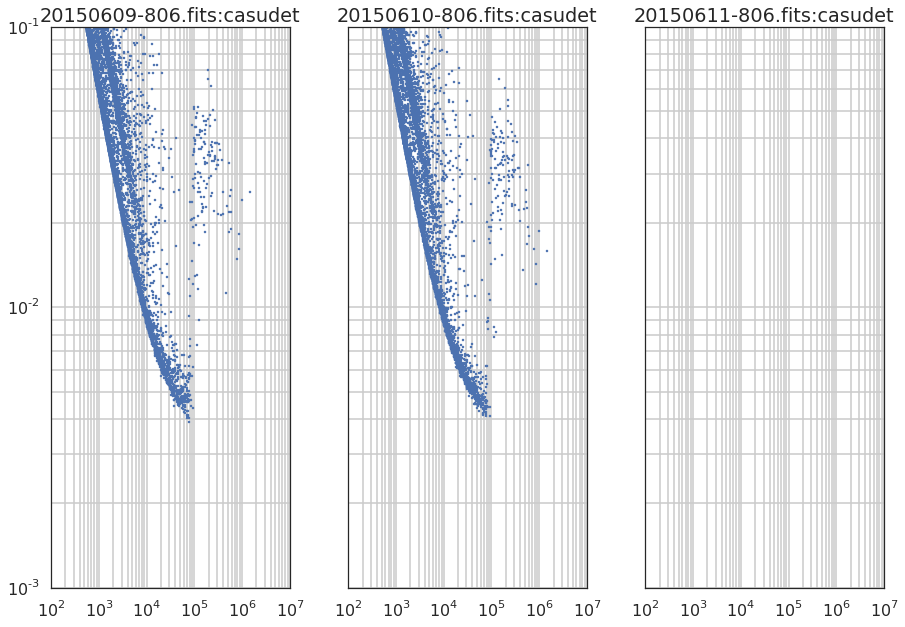

In [30]:
plot_frms(glob.glob('other_nights/*806*.fits'), hdu='casudet', xlim=(1E2, 1E7), ylim=(1E-3, 1E-1))    

Looking at the other cameras, it is possible that the middle night (voltage 223) is worse in camera 805 than the previous night (voltage 122). Conversely it's marginally better for 806. There seems to be quite a bit of variation but it is possible that the worse frms from 223 is a nightly effect.